# Project
## Voice Gender Recognition with Logistic Regression & MLP

### Import requied libraries

In [161]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries and modules required for modeling:

from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.model_selection import train_test_split

# Libraries and modules required for visualization:

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=16,8

import warnings
warnings.filterwarnings('ignore')

### Read and Load dataset

In [162]:
data = pd.read_csv("voice.csv")

In [163]:
data.head() # Print the first five row

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [164]:
data.label = [1 if each == "male" else 0 for each in data.label] # Convert nominal label values to numeric(binary)


In [165]:
y = data.label.values # main results male or female
x_data = data.drop(["label"], axis = 1) # prediction components

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values # all data evaluated from 1 to

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) # Separate data for test and train

In [167]:
# Data Shapes
print("x_train.shape : ", x_train.shape)
print("x_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

x_train.shape :  (2534, 20)
x_test.shape :  (634, 20)
y_train.shape :  (2534,)
y_test.shape :  (634,)


In [168]:
# Transform features to rows (Transpose)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

### LogisticRegression

In [169]:
lr = LogisticRegression() # Build an object
lr.fit(x_train.T, y_train.T) # Train 
logistic_acc = lr.score(x_test.T, y_test.T) # Test
print("test accuracy {}".format(lr.score(x_test.T, y_test.T)))

test accuracy 0.9810725552050473


### MLP

###### We build our model once and evaluate it. Then we make the changes as requested and report the results.

In [170]:
# Build a simple dense model with sigmoid for binary classification, remember we have 2 classes
model = Sequential() # Build the model
model.add(Dense(128, input_shape=(20,), activation = 'relu')) # Input layer
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu')) # First hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu')) # Seccond hidden layer
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid')) # Output layer

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') # Compile the model

In [171]:
model.summary() # Print model summary

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_209 (Dense)           (None, 128)               2688      
                                                                 
 dropout_157 (Dropout)       (None, 128)               0         
                                                                 
 dense_210 (Dense)           (None, 64)                8256      
                                                                 
 dropout_158 (Dropout)       (None, 64)                0         
                                                                 
 dense_211 (Dense)           (None, 32)                2080      
                                                                 
 dropout_159 (Dropout)       (None, 32)                0         
                                                                 
 dense_212 (Dense)           (None, 1)               

In [173]:
history = model.fit(x_train.T, y_train.T, batch_size=30, epochs=100, verbose=5) # Fit the model

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

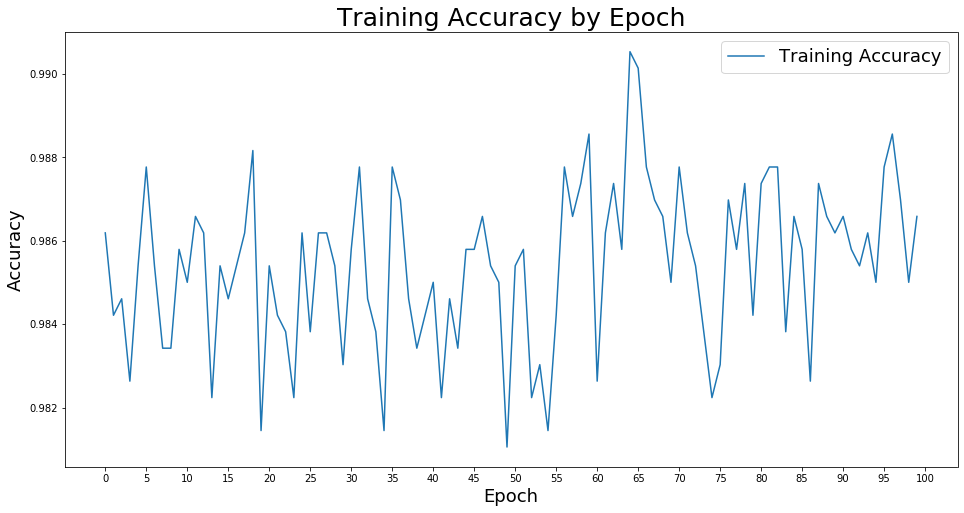

In [190]:
# Check out our train accuracy over epochs
train_accuracy = history.history['accuracy']

# Generate line plot of training accuracy over epochs
plt.plot(train_accuracy, label='Training Accuracy')

# Set title
plt.title('Training Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(0,105,5), range(0,105,5))
plt.legend(fontsize = 18);

In [176]:
# Evaluating the model using the testing set
loss, accuracy = model.evaluate(x_test.T, y_test.T, verbose=0)
print("Loss:", loss)
print("Accuracy:" , accuracy)

Loss: 0.050020914524793625
Accuracy: 0.9810725450515747


### Define the MLP model function
The function is defined in such a way that each time only the required parameters are changed and the rest of the parameters remain constant.

In [177]:
def MLP(activation_ = 'relu' , number_neurons = 32 , dropout = 0.3):

    model = Sequential()
    model.add(Dense(128, input_shape=(20,), activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(64, activation = activation_))
    model.add(Dropout(0.3))
    model.add(Dense(number_neurons, activation = activation_))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

### 1.Logistic vs MLP

In [178]:
print("Accuracy for Logistic:" , logistic_acc)
print("Accuracy for    MLP  :" , accuracy)

Accuracy for Logistic: 0.9810725552050473
Accuracy for    MLP  : 0.9810725450515747


##### Observation:
Almost the same accuracy is obtained. By changing the parameters, you can see changes in accuracy.

### 2.ReLU vs Sigmoid vs Tanh in hidden layers

In [179]:
model_relu = MLP(activation_='relu') # Model with ReLU activation function in hidden layers
model_sigmoid = MLP(activation_='sigmoid') # Model with sigmoid activation function in hidden layers
model_tanh = MLP(activation_='tanh') # Model with tanh activation function in hidden layers

In [180]:
# Define the model training function
def Train(model):
    model.fit(x_train.T, y_train.T, batch_size=30, epochs=100, verbose = 0)
    return model

In [181]:
# Define the model testing function
def Test(model):
    loss, accuracy = Train(model).evaluate(x_test.T, y_test.T, verbose=0)
    return accuracy

In [183]:
acc_relu = Test(model_relu)
acc_sigmoid = Test(model_sigmoid)
acc_tanh = Test(model_tanh)

In [185]:
print("Accuracy for ReLU   :",acc_relu)

print("Accuracy for Sigmiod:",acc_sigmoid)

print("Accuracy for Tanh   :",acc_tanh)

Accuracy for ReLU   : 0.9779179692268372
Accuracy for Sigmiod: 0.9779179692268372
Accuracy for Tanh   : 0.9810725450515747


##### Observation:
The accuracy of the model is equal to the activation function of relu and sigmoid and is slightly worse than tanh.

### 3.Number of Neurons in the seccond hidden layer

In [187]:
num = [5,25,50,100,200] # Different values for the number of neurons
acc_number_neurons = []
for i in num:
    model_num = MLP(number_neurons = i)
    acc_num = Test(model_num)
    acc_number_neurons.append(acc_num)
print(acc_number_neurons)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

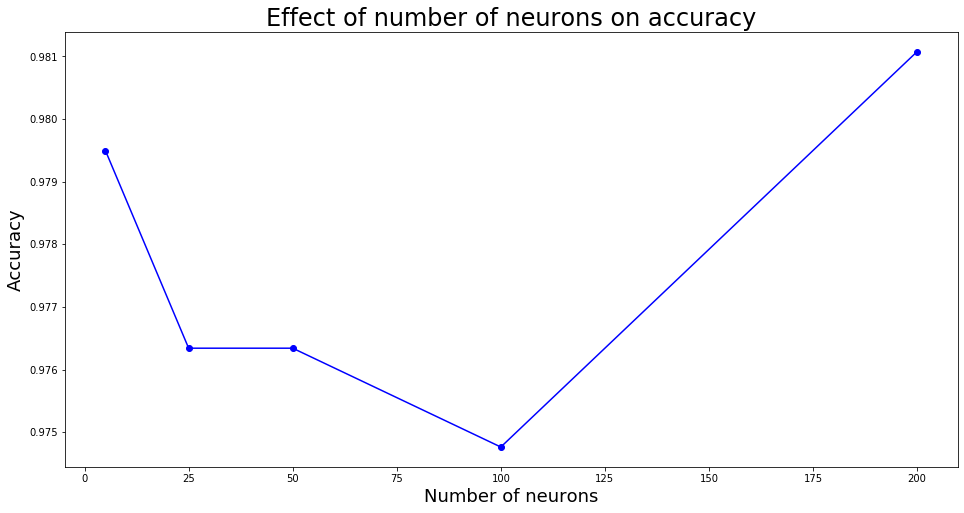

In [189]:
# Effect of number of neurons on accuracy
plt.plot(num, acc_number_neurons, color = 'blue' , marker='o')
plt.title('Effect of number of neurons on accuracy', fontsize = 24)
plt.xlabel('Number of neurons', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(0,225,25), range(0,225,25))
plt.show()

##### Observation:
The accuracy of the model with the lower number of neurons in the second hidden layer is greater. As the number of neurons increases, the accuracy first decreases and then increases (it fluctuates).

### 4.The dropout rate in the first hidden layer

In [159]:
drop = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # Different values for dropout
acc_dropout = []
for i in drop:
    model_drop = MLP(dropout = i)
    acc_drop = Test(model_drop)
    acc_dropout.append(acc_drop)
print(acc_dropout)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

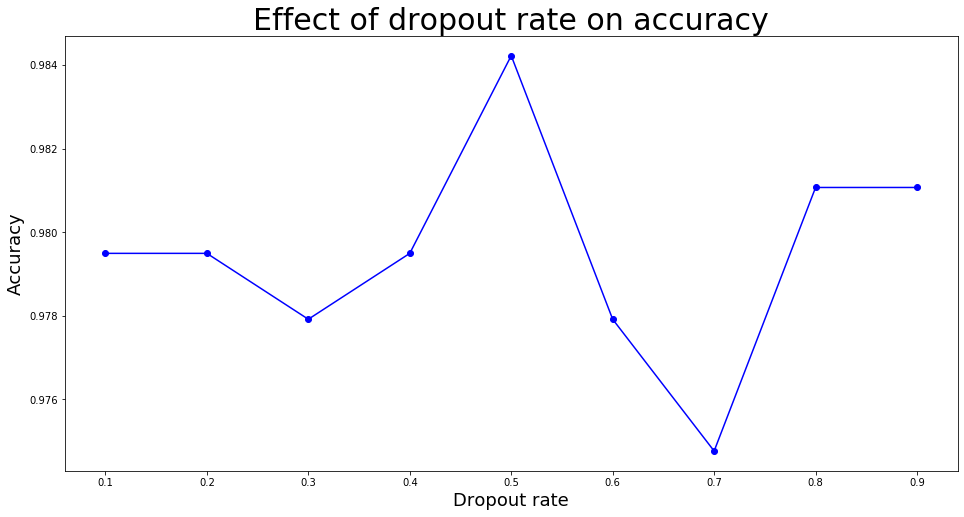

In [160]:
# Effect of dropout rate on accuracy
plt.plot(drop, acc_dropout, color = 'blue', marker='o')
plt.title('Effect of dropout rate on accuracy', fontsize = 30)
plt.xlabel('Dropout rate', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.show()

##### Observations:
When the dropout rate is 0.5, we have the highest accuracy. The accuracy trend here is also volatile.